# Trabalho Prático nº 1 - Análise de Expressões Faciais em Vídeo
## Tópicos de Ciência dos Dados - MECD (2023/2024)

- Carlos Matos - 2020245868
- Mariana Magueijo - 2020246886

### Parte B

#### 1. Data Spliting e Métricas de Exatidão em Machine Learning

##### 1.1 Data spliting

1.1.1 Train-Test e Train-Validation-Test

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from ReliefF import ReliefF
from skfeature.function.similarity_based import fisher_score
import os
import pickle as pkl
from sklearn.neural_network import MLPClassifier

In [234]:
def train_test(data, target, train_size):
    x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=train_size)
    tt = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]}
    return tt

In [235]:
def train_validation_test(data, target, train_size, test_size):
    x_train, x_rem, y_train, y_rem = train_test_split(data, target, train_size=train_size)
    test_size = test_size/(1 - train_size)
    x_validation, x_test, y_validation, y_test = train_test_split(x_rem, y_rem, train_size=test_size)
    t_validation = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test], "VALIDATION": [x_validation, y_validation]}
    
    return t_validation

##### 1.1.2 K-Fold

In [236]:
def k_fold(x, y, n_split):
    k = KFold(n_splits=n_split, shuffle=True)
    kfold = []
    for i, j in k.split(x):
        x_train, x_test = x[i], x[j]
        y_train, y_test = y[i], y[j]
        kfold.append({"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]})
    
    return kfold

##### 1.2 Métricas de exatidão

1.2.1 Matriz de confusão

In [237]:
def metrics(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    r = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    ps = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    fs = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    if labels is not None:
        try:
            display(pd.DataFrame([r, ps, fs], columns=['Metrics']).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1-score'}))
            cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
            _, ax = plt.subplots(figsize=(5,5))
            cmp.plot(ax=ax)
            ax.set_title("Confusion Matrix")
            ax.set_xlabel("Predicted")
            ax.set_xticklabels(labels, rotation="vertical")
            ax.set_ylabel("True")
            plt.show()
        except pd.errors.DtypeWarning as pd_error:
            print(f"Pandas Error: {pd_error}")
        except Exception as e:
            display(pd.DataFrame([cm, r, ps, fs], columns=['Metrics']).rename(index={0: 'Confusion Matrix', 1: 'Recall', 2: 'Precision', 3: 'F1-score'}))
    return cm, r, ps, fs

#### 2. K-Nearest Neighbours

##### 2.1 Data set Iris

In [238]:
def dataset_iris():
    iris = datasets.load_iris()
    data = iris["data"]
    target = iris["target"]
    labels = iris["target_names"]
    feature = iris["feature_names"]
    return data, target, labels, feature, iris

In [239]:
array_k = np.array([1, 3, 5, 7, 9, 11, 13, 15])
d, t, l, feat, iris= dataset_iris()

In [240]:
def k_nearest_neighbours(x, y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x, y)
    return neigh

2.1.1  Train-only

In [241]:
def to_2_1_1(x, y, labels, k):
    neigh = k_nearest_neighbours(x, y, k)
    y_pred = neigh.predict(x)
    y_true = y
    metrics(y_true, y_pred, labels)

------------------ Train-Only ------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


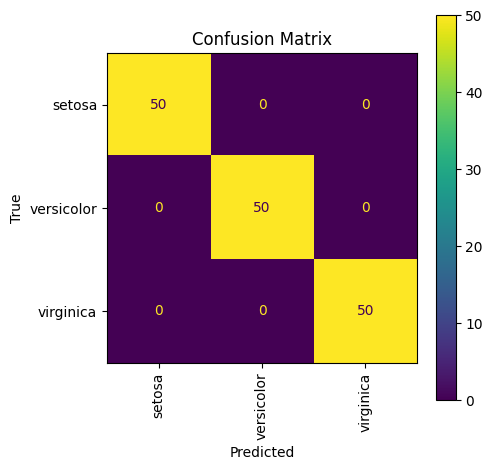

In [242]:
print("------------------ Train-Only ------------------")
to_2_1_1(d, t, l, 1)

2.1.1 TT 70-30

In [243]:
def tt_2_1_1(x, y, labels, k):
    tt = train_test(x, y, 0.7)
    neigh = k_nearest_neighbours(tt["TRAIN"][0], tt["TRAIN"][1], k)
    y_pred = neigh.predict(tt["TEST"][0])
    y_true = tt["TEST"][1]
    metrics(y_true, y_pred, labels)

------------------ Train-Test ------------------


,Metrics
Recall,0.933333
Precision,0.936471
F1-score,0.934135


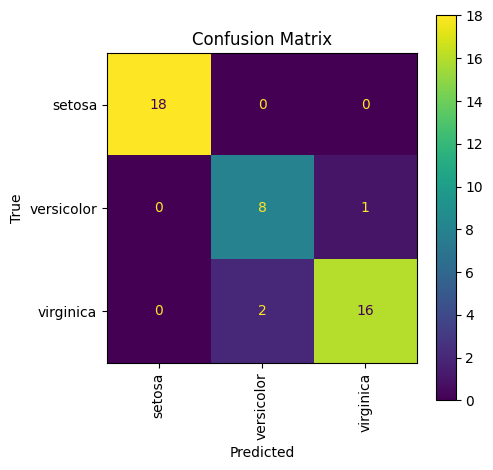

In [244]:
print("------------------ Train-Test ------------------")
tt_2_1_1(d, t, l, 1)

2.1.1  10x10-fold cross-validation (10CV)

In [245]:
def cv_2_1_1(x, y, n_splits, labels, k):
    kfold = k_fold(x, y, n_splits)
    count = 0
    for i in kfold:
        print("-> Iteração " + str(count) + "\n")
        neigh = k_nearest_neighbours(i["TRAIN"][0], i["TRAIN"][1], k)
        y_pred = neigh.predict(i["TEST"][0])
        y_true = i["TEST"][1]
        metrics(y_pred, y_true, labels)
        count += 1

------------------ Cross-Validation ------------------
-> Iteração 0



,Metrics
Recall,0.933333
Precision,0.955556
F1-score,0.937436


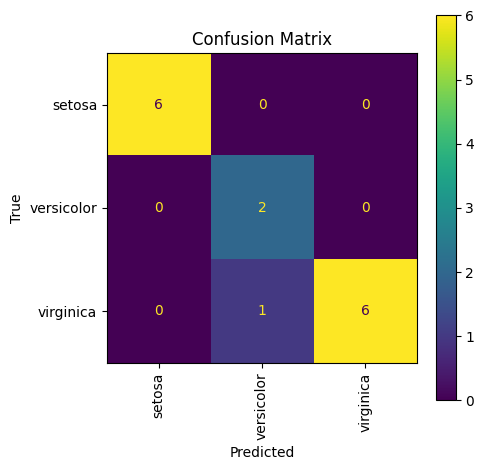

-> Iteração 1



,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.933333


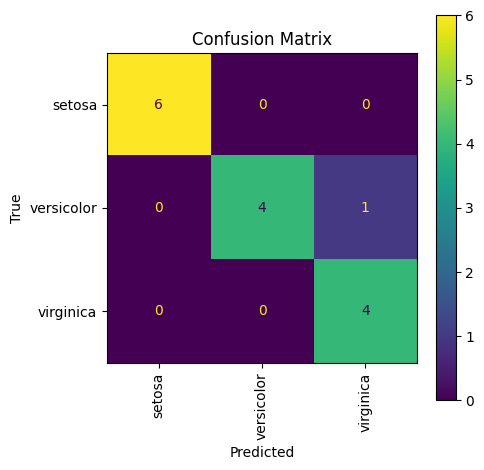

-> Iteração 2



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


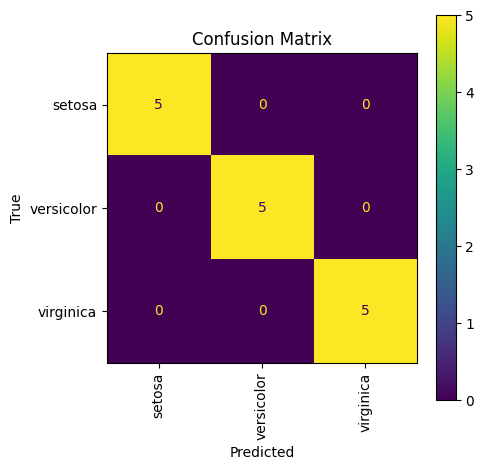

-> Iteração 3



,Metrics
Recall,0.933333
Precision,0.950000
F1-score,0.935065


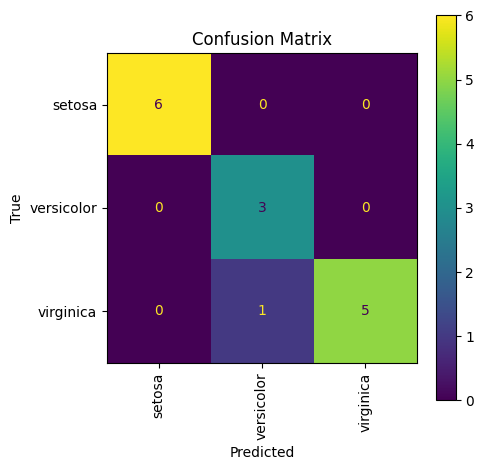

-> Iteração 4



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


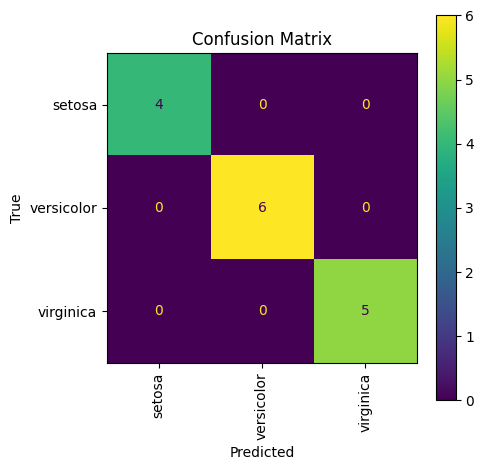

-> Iteração 5



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


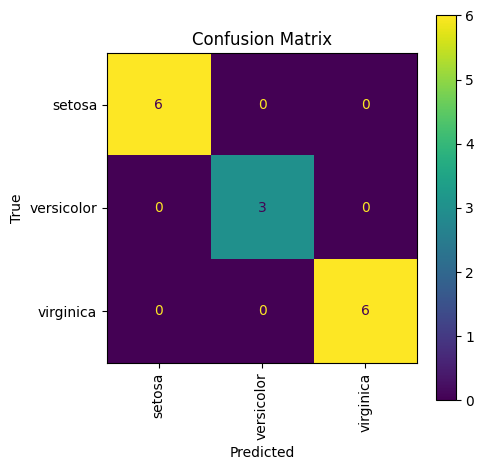

-> Iteração 6



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


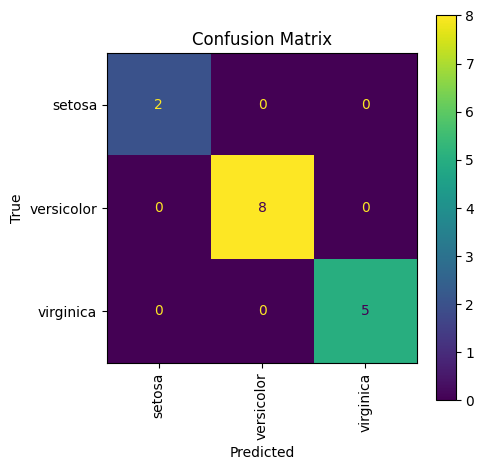

-> Iteração 7



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


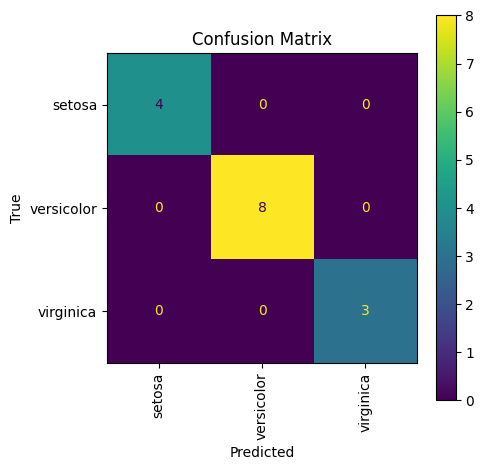

-> Iteração 8



,Metrics
Recall,0.866667
Precision,0.866667
F1-score,0.866667


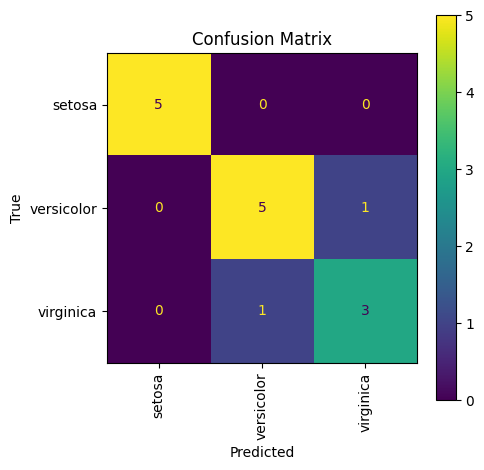

-> Iteração 9



,Metrics
Recall,0.933333
Precision,0.944444
F1-score,0.931602


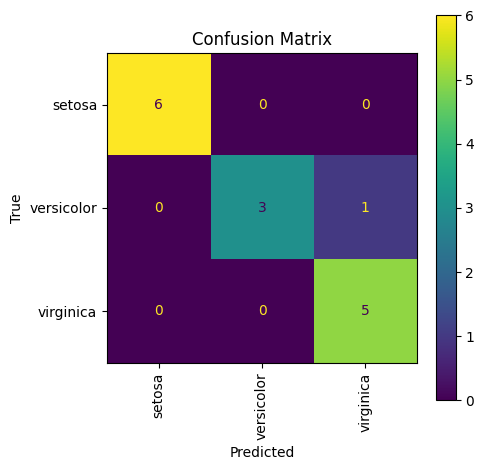

In [246]:
print("------------------ Cross-Validation ------------------")
cv_2_1_1(d, t, 10, l, 1)

2.1.2 Funções auxiliares

In [247]:
def plot_metrics(d_metrics):
    plt.plot(d_metrics["Recall"], label="Recall")
    plt.plot(d_metrics["Precision"], label="Precision")
    plt.plot(d_metrics["F1-score"], label="F1-score")
    plt.title("Metrics Comparison")
    plt.xlabel("K values")
    plt.ylabel("Metrics")
    plt.legend()
    plt.show()

In [248]:
def return_d_metrics(x, y):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        neigh = k_nearest_neighbours(x, y, k)
        y_pred = neigh.predict(x)
        y_true = y
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

2.1.2 Train-Only

In [249]:
def to_2_1_2(x, y, labels, plot):
    d_metrics = return_d_metrics(x, y)
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]

    neigh = k_nearest_neighbours(x, y, best_k)
    y_pred = neigh.predict(x)
    y_true = y
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

------------------ Train-Only ------------------


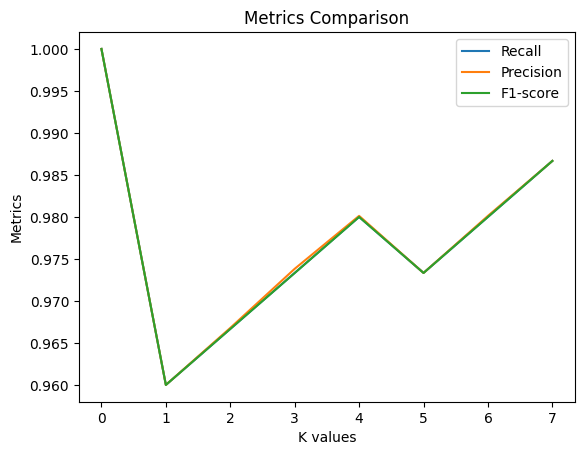

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


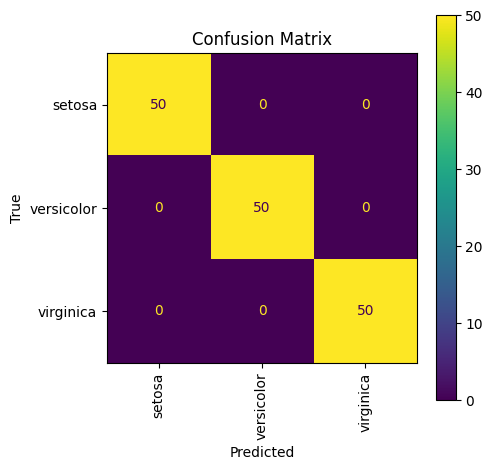

In [250]:
print("------------------ Train-Only ------------------")
to_2_1_2(d, t, l, True)

2.1.2 TVT 40-30-30

In [251]:
def tvt_d_metrics(x, y):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        tv = train_validation_test(x, y, 0.4, 0.3)
        neigh = k_nearest_neighbours(tv["TRAIN"][0], tv["TRAIN"][1], k)
        y_pred = neigh.predict(tv["VALIDATION"][0])
        y_true = tv["VALIDATION"][1]
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

In [252]:
def tvt_2_1_2(x, y, labels, plot):
    d_metrics = tvt_d_metrics(x, y)
    
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
    tv = train_validation_test(x, y, 0.4, 0.3)
    new_t0 = np.concatenate((tv["TRAIN"][0], tv["VALIDATION"][0]), axis=0)
    new_t1 = np.concatenate((tv["TRAIN"][1], tv["VALIDATION"][1]), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    y_pred = neigh.predict(tv["TEST"][0])
    y_true = tv["TEST"][1]
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

------------------ Train-Validation-Test ------------------


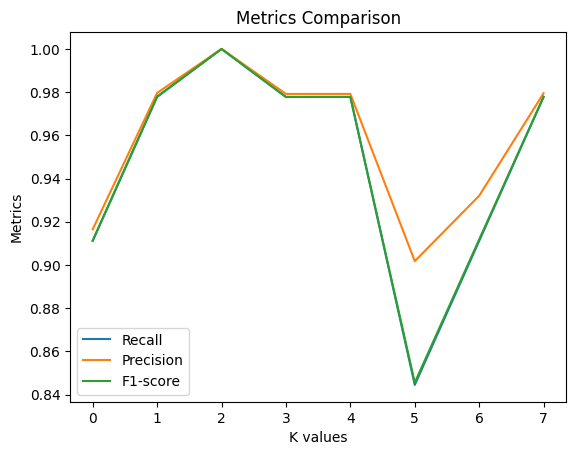

Best k: 5


,Metrics
Recall,0.977778
Precision,0.978889
F1-score,0.977704


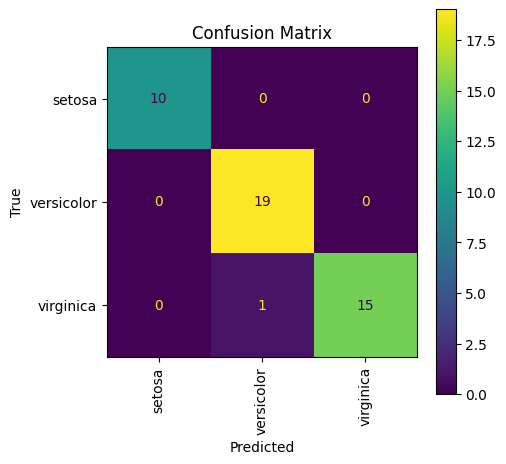

In [253]:
print("------------------ Train-Validation-Test ------------------")
tvt_2_1_2(d, t, l, True)

2.1.2  10x10CV

In [254]:
def cv_d_metrics(kfold):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}

    for k in array_k:
        neigh = k_nearest_neighbours(kfold["TRAIN"][0], kfold["TRAIN"][1], k)
        y_pred = neigh.predict(kfold["TEST"][0])
        y_true = kfold["TEST"][1]
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)

    return d_metrics

In [255]:
def cv_2_1_2(x, y, labels, plot):
    kfold = k_fold(x, y, 10)
    count = 0
    for k in kfold:
        print("-> Iteração " + str(count) + "\n")
        d_metrics = cv_d_metrics(k)
        best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
        neigh = k_nearest_neighbours(k["TRAIN"][0], k["TRAIN"][1], best_k)
        y_pred = neigh.predict(k["TEST"][0])
        y_true = k["TEST"][1]
        
        if plot:
            plot_metrics(d_metrics)
            print("Best k: " + str(best_k))
            metrics(y_true, y_pred, labels)
        count += 1

------------------ Cross-Validation ------------------
-> Iteração 0



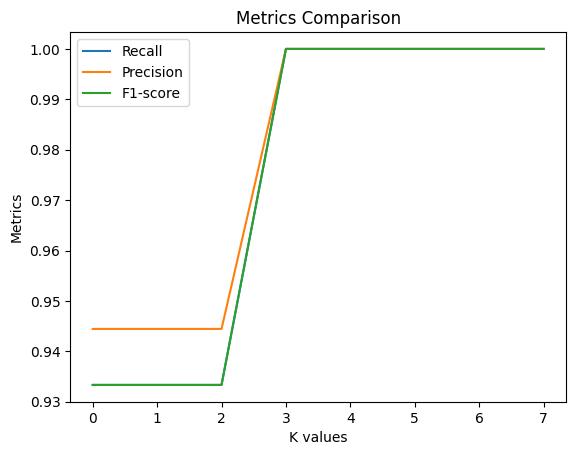

Best k: 7


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


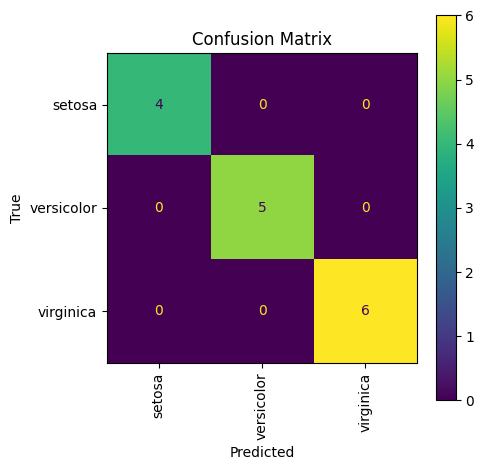

-> Iteração 1



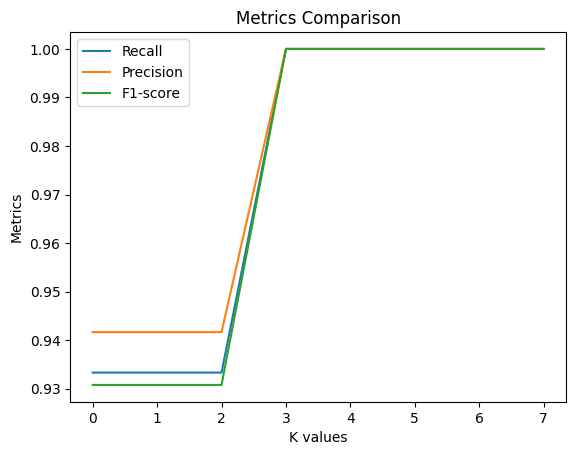

Best k: 7


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


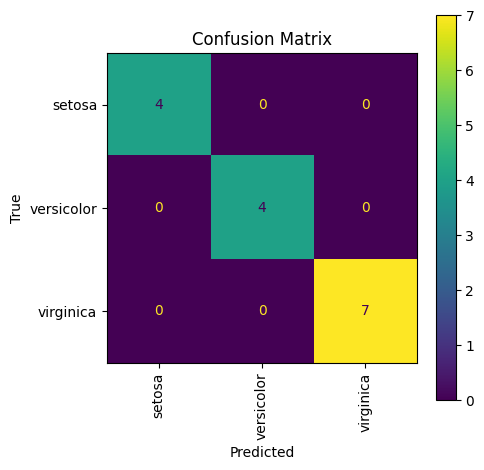

-> Iteração 2



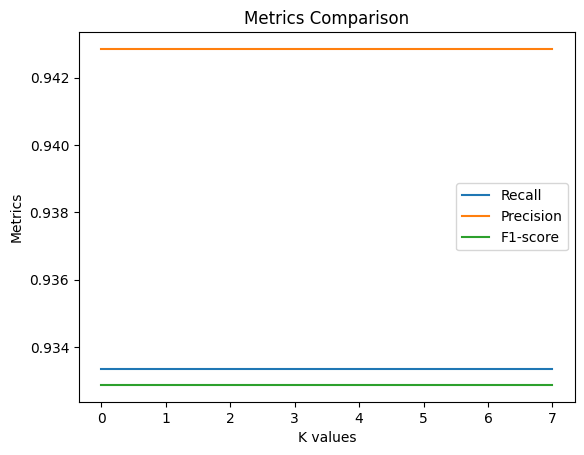

Best k: 1


,Metrics
Recall,0.933333
Precision,0.942857
F1-score,0.932867


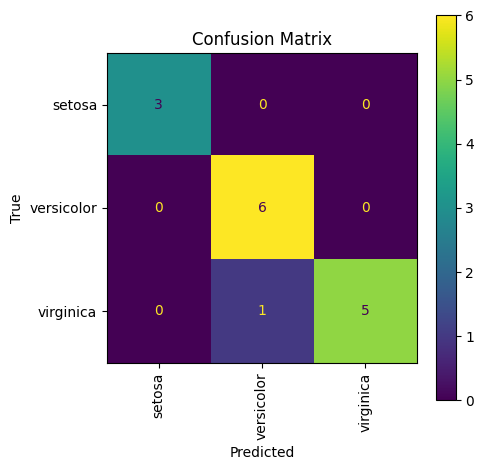

-> Iteração 3



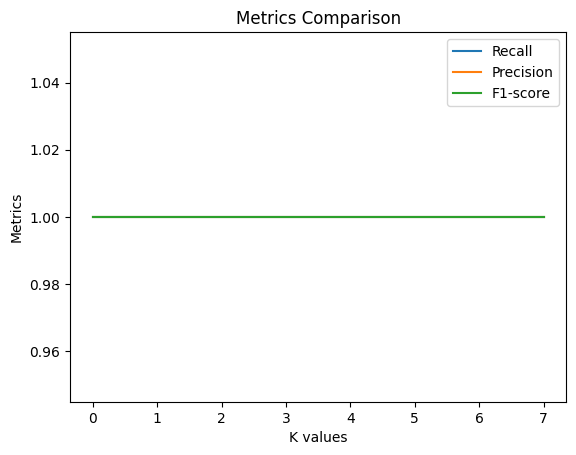

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


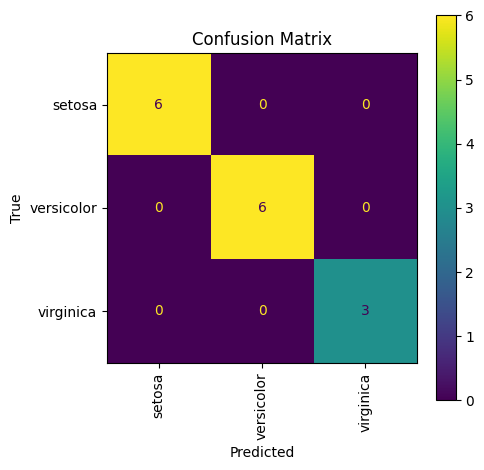

-> Iteração 4



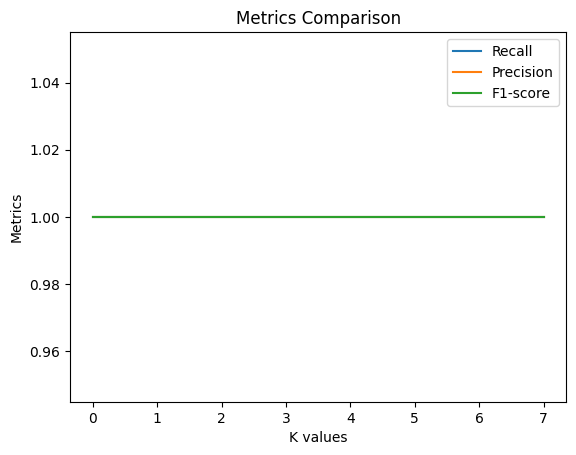

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


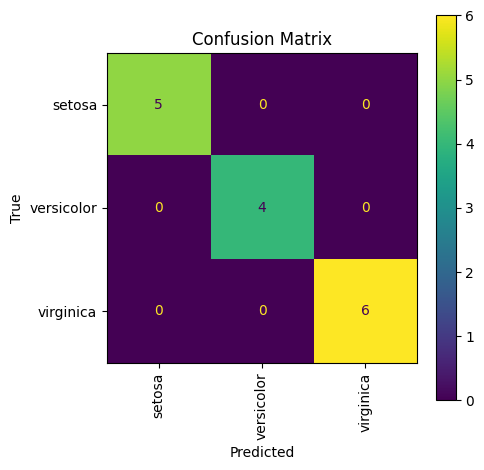

-> Iteração 5



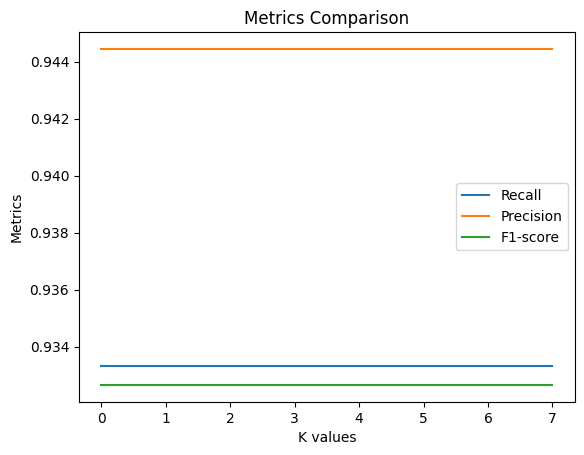

Best k: 1


,Metrics
Recall,0.933333
Precision,0.944444
F1-score,0.932660


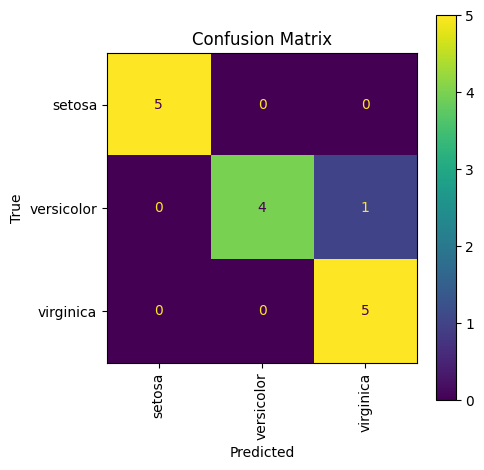

-> Iteração 6



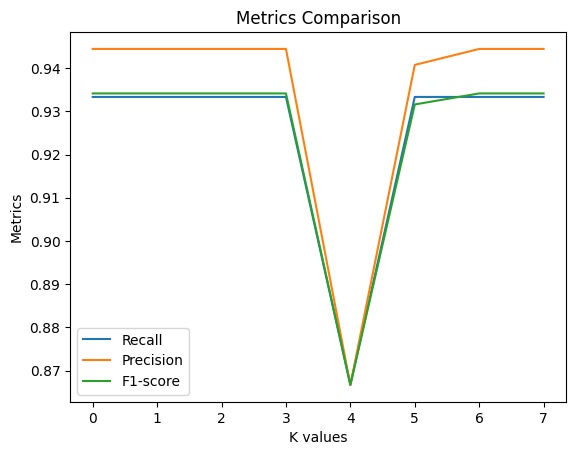

Best k: 1


,Metrics
Recall,0.933333
Precision,0.944444
F1-score,0.934141


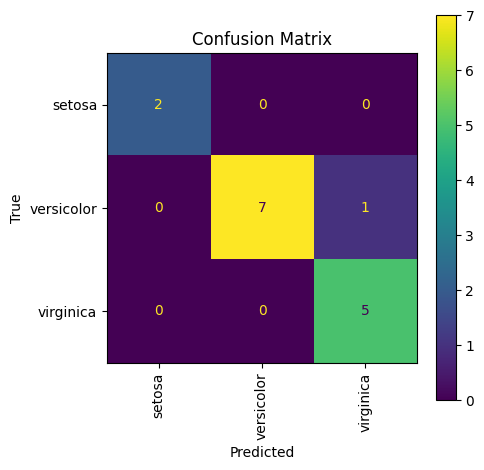

-> Iteração 7



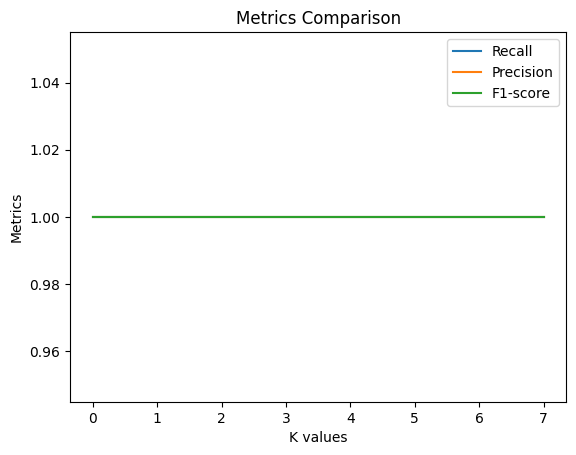

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


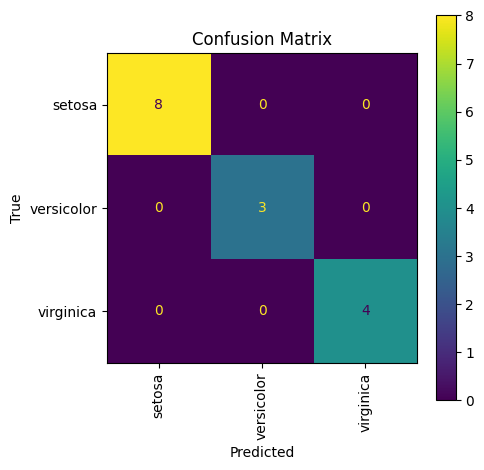

-> Iteração 8



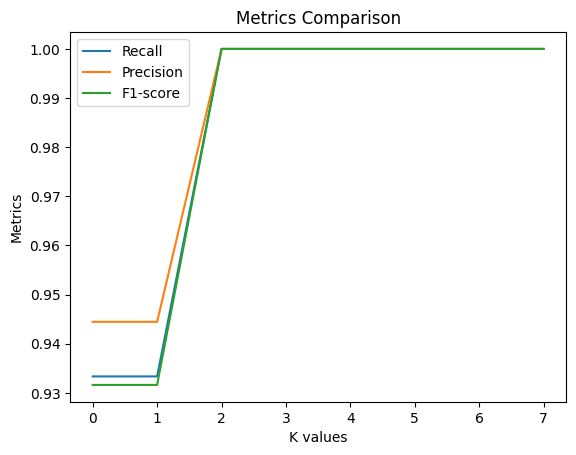

Best k: 5


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


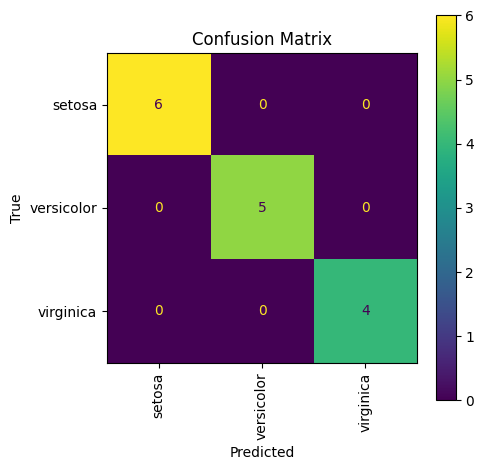

-> Iteração 9



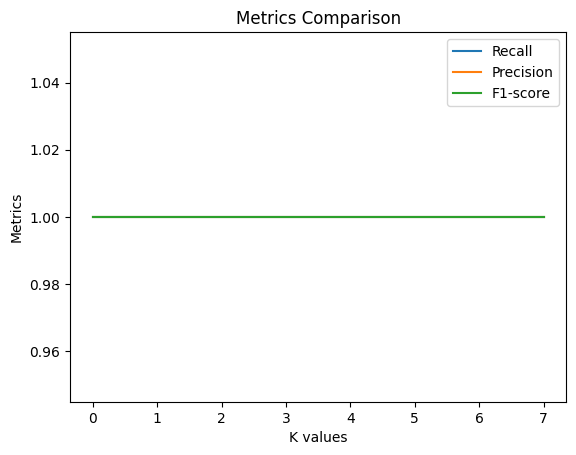

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


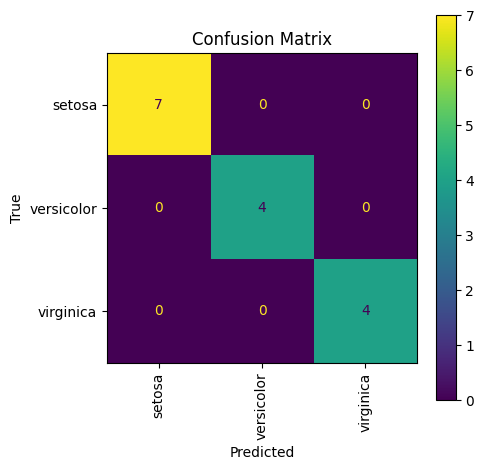

In [256]:
print("------------------ Cross-Validation ------------------")
cv_2_1_2(d, t, l, True)

#### 2.2 Ranking de Features e Modelo Ideal

In [257]:
def reliefF(x, y):
    fs = ReliefF(n_features_to_keep=10)
    fs.fit_transform(x, y)

    return fs.top_features[:10]

2.2.1 Métrica F1-score com critério

In [258]:
def parameters_to_print(f1_aux, f, x_train, x_validation, tv, string_features, i, plot):
    best_k = array_k[f1_aux.index(max(f1_aux))]
    string_features["Number of Features"].append(str(len(f)))
    string_features["Best k"].append(str(best_k))

    new_t0 = np.concatenate((x_train, x_validation), axis=0)
    new_t1 = np.concatenate((tv['TRAIN'][1], tv['VALIDATION'][1]), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    x_test = tv['TEST'][0][:, f]
    y_pred = neigh.predict(x_test)
    y_true = tv['TEST'][1]
    cm, r, ps, fs = metrics(y_true, y_pred, None)
    string_features["F1-score"].append(str(fs))
    if plot:
        for p in string_features:
            print(p + ": " + string_features[p][i])
    return fs, string_features

In [259]:
def plot_features(f1, x_size, y_size):
    plt.figure(figsize=(x_size, y_size))
    plt.plot(f1)
    plt.axis("off")
    plt.show()

In [260]:
def plot_f1_score(f1, x_size, y_size):
    plt.figure(figsize=(x_size, y_size))
    for i in range(len(f1)):
        label = "Feature: " + str(i + 1)
        plt.plot(f1[i], label=label)
    plt.title("F1-score Comparision per Feature")
    plt.xlabel("k values")
    plt.ylabel("F1-score")
    plt.legend()
    plt.show()

In [261]:
def ranking_features(x, y, feat, n_repetitions, plot):
    tv = train_validation_test(x, y, 0.4, 0.3)
    f1 = []
    array_elbow = []
    string_features = {"Number of Features": [], "Best k": [], "F1-score": []}

    for i in range(n_repetitions):
        f1_aux = []
        f = feat[: (i + 1)]
        x_train = tv["TRAIN"][0][:, f]
        x_validation = tv["VALIDATION"][0][:, f]
        for k in array_k:
            neigh = k_nearest_neighbours(x_train, tv["TRAIN"][1], k)
            
            y_pred = neigh.predict(x_validation)
            y_true = tv["VALIDATION"][1]
            cm, r, ps, fs = metrics(y_true, y_pred, None)
            f1_aux.append(fs)
        f1.append(f1_aux)
        if plot: 
            plot_features(f1_aux, 3, 1)
        fs, string_features = parameters_to_print(f1_aux, f, x_train, x_validation, tv, string_features, i, plot)
        array_elbow.append(fs)
    
    return array_elbow, f1, string_features

------------------ Features Ranking ------------------


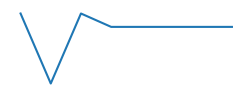

Number of Features: 1
Best k: 1
F1-score: 0.9099906629318394


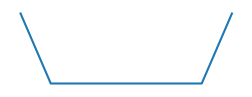

Number of Features: 2
Best k: 1
F1-score: 0.9554629629629631


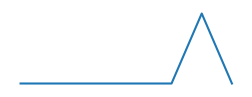

Number of Features: 3
Best k: 13
F1-score: 1.0


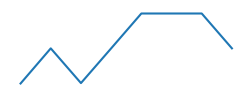

Number of Features: 4
Best k: 9
F1-score: 1.0


In [262]:
print("------------------ Features Ranking ------------------")
feat = reliefF(d, t)
number_repetitions = 4
f1_score_elbow, f1_score_1, str_print = ranking_features(d, t, feat, number_repetitions, True)

2.2.2 Gráfico do Cotovelo

In [263]:
def plot_elbow(array_elbow):
    index = np.arange(1, len(array_elbow) + 1)
    plt.figure(figsize=(5,5))
    plt.plot(index, array_elbow)
    plt.title("Elbow Graph")
    plt.xlabel("Number of Features")
    plt.ylabel("F1-score")
    plt.show()

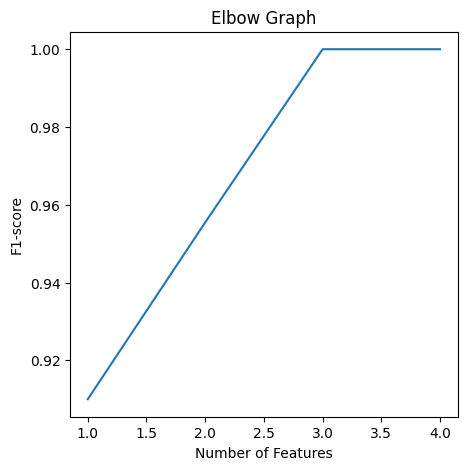

In [264]:
plot_elbow(f1_score_elbow)

2.2.3 Resultados Alcançados

In [265]:
def results(f1, feature):
    label = ['Nº of features: ' + str(i + 1) for i in range(len(feature))]
    col = ['k=' + str(i) for i in array_k]
    df = pd.DataFrame(f1, columns=col, index=label)
    display(df)
    plot_f1_score(f1, 8, 8)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.933136,0.817989,0.933136,0.911111,0.911111,0.911111,0.911111,0.911111
Nº of features: 2,0.977800,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.977800
Nº of features: 3,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.977800,0.955556
Nº of features: 4,0.933138,0.955556,0.933399,0.955556,0.977800,0.977800,0.977800,0.955556


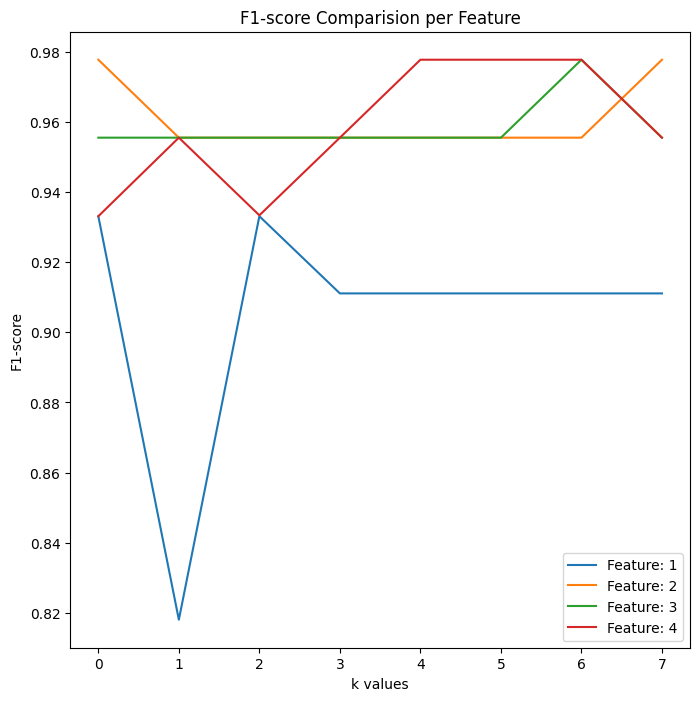

In [266]:
results(f1_score_1, feat)

2.2.4 Resultados modelo ideal à medida que se adicionam features

In [267]:
def ideal_model(str_print, number_repetitions):
    for i in range(number_repetitions):
        for d in str_print:
            print(d + ": " + str_print[d][i])
        print("-" * 30)

In [268]:
ideal_model(str_print, number_repetitions)

Number of Features: 1
Best k: 1
F1-score: 0.9099906629318394
------------------------------
Number of Features: 2
Best k: 1
F1-score: 0.9554629629629631
------------------------------
Number of Features: 3
Best k: 13
F1-score: 1.0
------------------------------
Number of Features: 4
Best k: 9
F1-score: 1.0
------------------------------


##### 2.4 Classe iris-versicolor e classe iris-viriginica

In [269]:
def fisherscore(x, y):
    return fisher_score.fisher_score(x, y)

In [270]:
iris_dataframe = pd.DataFrame(d, columns=iris["feature_names"])
iris_dataframe["target"] = iris["target"]
setosa = iris_dataframe[iris_dataframe["target"] == 0]
vesicolor = iris_dataframe[iris_dataframe["target"] == 1].sample(30)
virginica = iris_dataframe[iris_dataframe["target"] == 2].sample(10)
new_iris = pd.concat([setosa, vesicolor, virginica], axis=0)
new_iris_grouped = new_iris.groupby("target").count()
display(new_iris)
display(new_iris_grouped)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,2
127,6.1,3.0,4.9,1.8,2
122,7.7,2.8,6.7,2.0,2
104,6.5,3.0,5.8,2.2,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,30,30,30,30
2,10,10,10,10


------------------ Class Imbalance ------------------


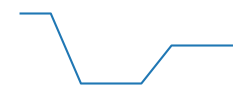

Number of Features: 1
Best k: 1
F1-score: 0.5742919389978214


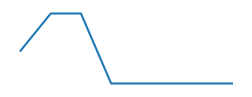

Number of Features: 2
Best k: 3
F1-score: 0.941077441077441


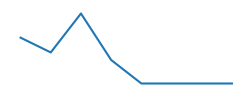

Number of Features: 3
Best k: 5
F1-score: 1.0


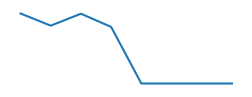

Number of Features: 4
Best k: 1
F1-score: 1.0


In [271]:
print("------------------ Class Imbalance ------------------") 


new_iris_data = np.array(new_iris.drop("target", axis=1))
new_iris_target = np.array(new_iris["target"])

feature_fisher = fisherscore(new_iris_data, new_iris_target)

f1_score_elbow, f1_score_2, str_print = ranking_features(new_iris_data, new_iris_target, feature_fisher, number_repetitions, True)


2.4.2 Gráfivo do Cotovelo

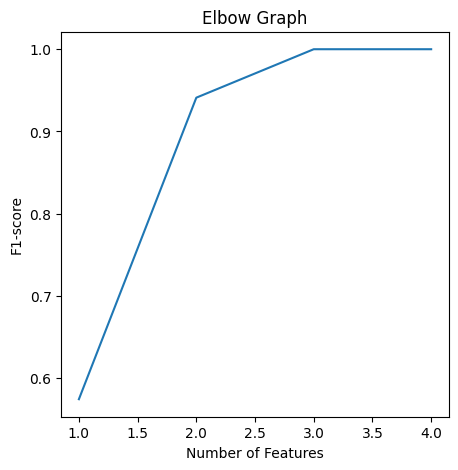

In [272]:
plot_elbow(f1_score_elbow)

2.4.3 Resultados Alcançados

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.663421,0.663421,0.591592,0.591592,0.591592,0.630579,0.630579,0.630579
Nº of features: 2,0.765873,0.784512,0.784512,0.749455,0.749455,0.749455,0.749455,0.749455
Nº of features: 3,0.888889,0.843915,0.962330,0.820988,0.749455,0.749455,0.749455,0.749455
Nº of features: 4,0.962963,0.925926,0.962330,0.921958,0.749455,0.749455,0.749455,0.749455


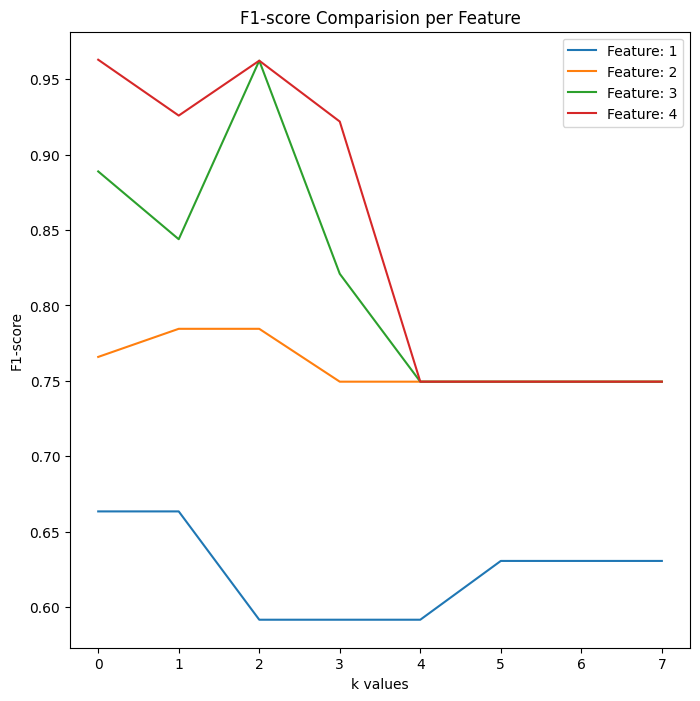

In [273]:
results(f1_score_2, feature_fisher)

2.4.4 Resultados modelo ideal à medida que se adicionam features

In [274]:
ideal_model(str_print, number_repetitions)

Number of Features: 1
Best k: 1
F1-score: 0.5742919389978214
------------------------------
Number of Features: 2
Best k: 3
F1-score: 0.941077441077441
------------------------------
Number of Features: 3
Best k: 5
F1-score: 1.0
------------------------------
Number of Features: 4
Best k: 1
F1-score: 1.0
------------------------------


#### 3. Aplicação do ponto 2 no nosso dataset

In [275]:
emotions_name = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

In [276]:
def create_dataframe():
    landmarks = 68
    files = os.listdir("dataset/")

    d = {}

    df_final = None
    done = {"01": [], "02": [], "03": [], "04": [], "05": [], "06": [], "07": [], "08": []}
    for file in files:
        d = {}
        divide = file.split("-")
        emotion = divide[2]
        actor = divide[-1].split(".")[0]
        if actor not in done[emotion]:
            done[emotion].append(actor)
            f = pd.read_csv("dataset/" + file)
            df = pd.DataFrame(f)
            for i in range(landmarks):
                x_land = "x_" + str(i)
                y_land = "y_" + str(i)
                d[x_land] = df[x_land].mean()
                d[y_land] = df[y_land].mean()
            d["emotion"] = emotions_name[int(emotion) - 1]
            if df_final is None:
                df_final = pd.DataFrame([d])
            else:
                df_final = pd.concat([df_final, pd.DataFrame([d])], ignore_index=True)

    return df_final


In [277]:
if os.path.exists("dataframe.pkl"):
    with open("dataframe.pkl", 'rb') as arq:
        df = pkl.load(arq)
else:
    df = create_dataframe()
    with open("dataframe.pkl", 'wb') as arq:
        pkl.dump(df, arq)

display(df)

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,...,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,emotion
0,479.256122,295.571429,479.818367,339.416327,484.219388,382.962245,490.951020,424.909184,503.239796,465.800000,...,453.195918,680.666327,454.706122,640.481633,458.360204,621.351020,460.224490,604.741837,458.416327,Neutral
1,462.933028,350.588073,467.066972,395.631193,475.288991,439.553211,485.684404,480.951376,502.852294,518.800917,...,498.031193,687.928440,501.000917,657.756881,506.601835,641.267890,508.551376,625.501835,507.316514,Neutral
2,487.913592,312.003883,487.692233,358.868932,491.813592,405.903883,499.776699,451.596117,516.871845,497.076699,...,497.120388,702.852427,502.320388,669.697087,505.648544,650.689320,506.713592,633.344660,503.723301,Neutral
3,495.651515,286.596970,494.503030,335.847475,497.510101,385.597980,503.123232,432.494949,515.752525,474.778788,...,453.887879,680.781818,460.260606,644.634343,462.722222,626.583838,463.035354,609.781818,460.559596,Neutral
4,482.202778,313.806481,484.869444,363.087963,492.240741,412.183333,502.454630,459.598148,518.387037,503.968519,...,487.485185,711.686111,492.372222,670.240741,495.675926,650.576852,497.664815,632.616667,495.675000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,474.635052,337.676289,478.524742,383.554639,486.597938,429.816495,499.124742,473.172165,520.896907,509.576289,...,459.141237,708.234021,466.255670,684.031959,469.911340,669.008247,472.091753,653.794845,472.404124,Surprised
188,478.157143,364.494286,479.562857,408.887619,486.560952,453.265714,498.435238,495.984762,516.215238,535.561905,...,516.225714,678.346667,522.517143,649.802857,533.440952,631.614286,536.023810,615.277143,533.509524,Surprised
189,462.821698,343.262264,464.033019,392.654717,470.537736,442.616981,481.199057,489.138679,498.672642,530.442453,...,485.001887,699.293396,497.083962,660.514151,499.631132,640.051887,500.883962,621.724528,499.255660,Surprised
190,468.872449,308.700000,468.580612,357.952041,473.829592,409.153061,483.071429,458.719388,500.234694,503.445918,...,464.170408,703.608163,470.836735,663.897959,471.282653,645.322449,473.061224,628.493878,472.052041,Surprised


In [278]:
expressions_data = df.drop("emotion", axis=1).values
expressions_target = df["emotion"].values
expressions_labels = np.array(df["emotion"].unique())

3.1.1. Train-only

------------------ Train-Only ------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


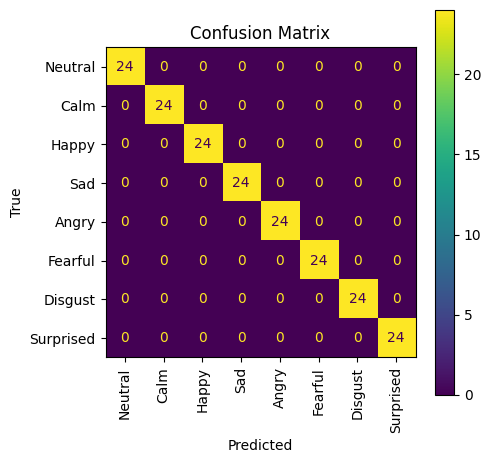

In [279]:
print("------------------ Train-Only ------------------")
to_2_1_1(expressions_data, expressions_target, expressions_labels, 1)

3.1.1. TT 70-30

------------------ Train-Test ------------------


,Metrics
Recall,0.086207
Precision,0.087069
F1-score,0.085660


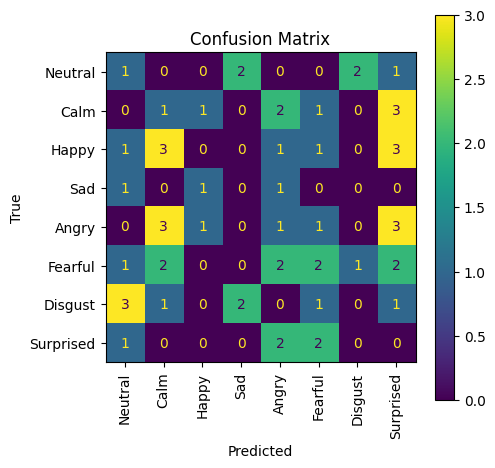

In [280]:
print("------------------ Train-Test ------------------")
tt_2_1_1(expressions_data, expressions_target, expressions_labels, 1)

3.1.1. 10x10-fold cross-validation (10CV)

------------------ Cross-Validation ------------------
-> Iteração 0



,Metrics
Recall,0.0
Precision,0.0
F1-score,0.0


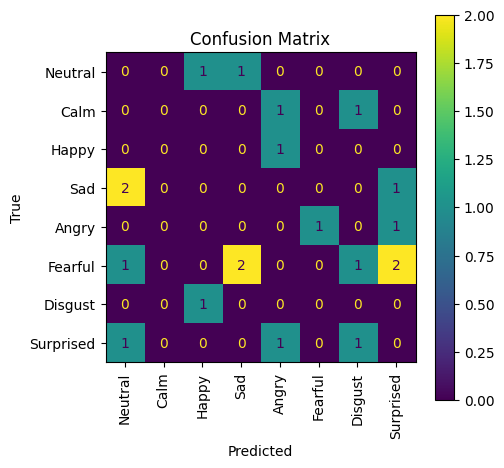

-> Iteração 1



,Metrics
Recall,0.100000
Precision,0.076667
F1-score,0.073810


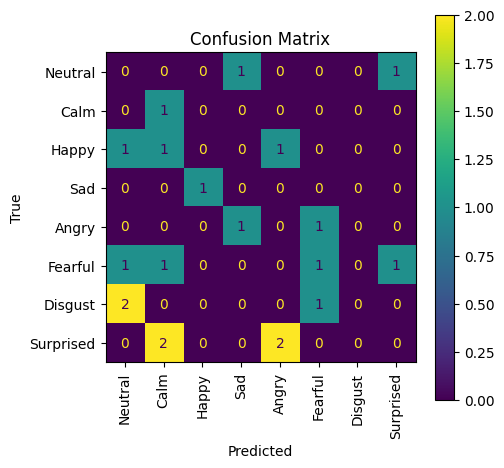

-> Iteração 2



,Metrics
Recall,0.157895
Precision,0.173684
F1-score,0.152047


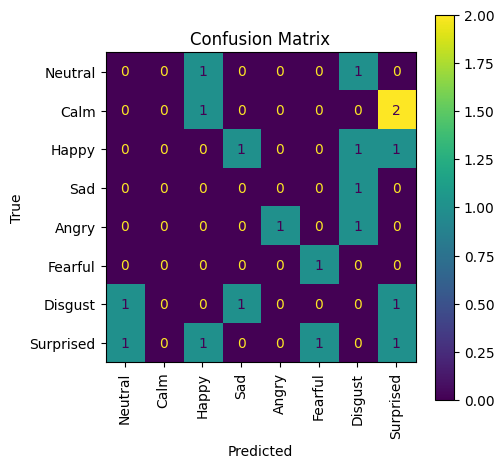

-> Iteração 3



,Metrics
Recall,0.105263
Precision,0.184211
F1-score,0.127820


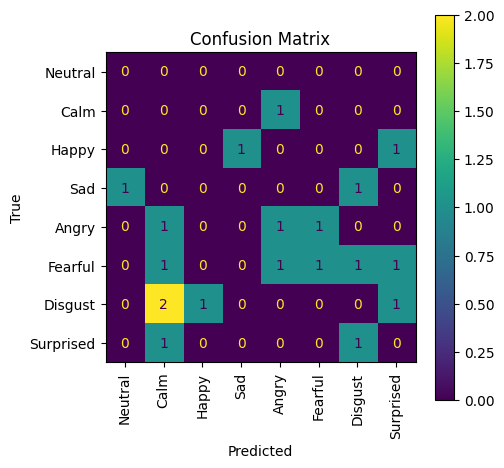

-> Iteração 4



,Metrics
Recall,0.0
Precision,0.0
F1-score,0.0


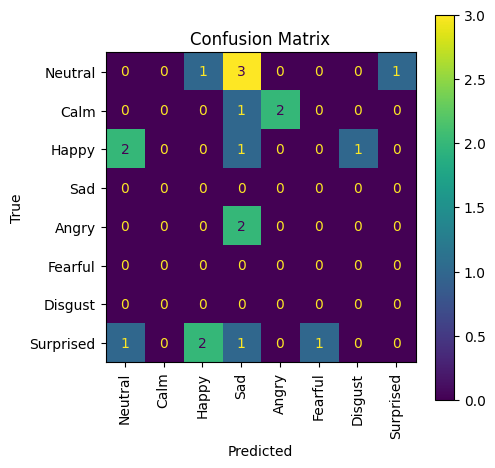

-> Iteração 5



,Metrics
Recall,0.263158
Precision,0.161404
F1-score,0.194987


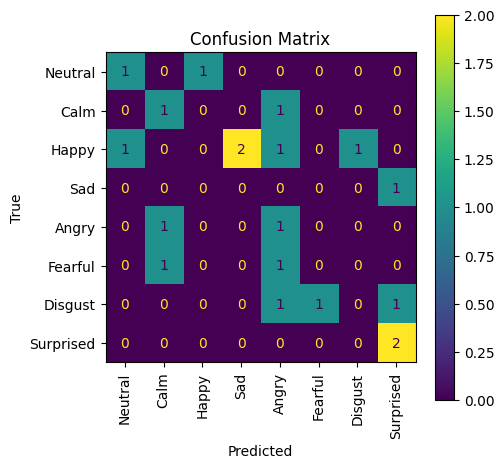

-> Iteração 6



,Metrics
Recall,0.105263
Precision,0.065789
F1-score,0.073684


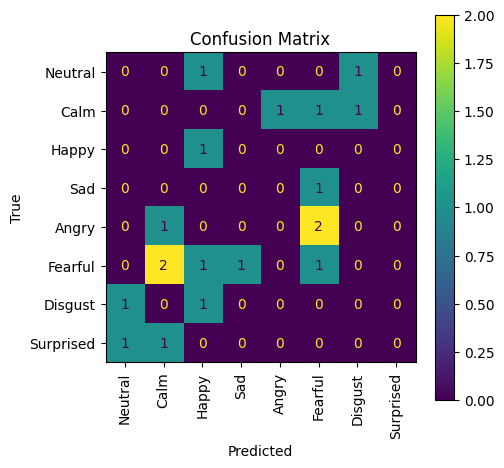

-> Iteração 7



,Metrics
Recall,0.0
Precision,0.0
F1-score,0.0


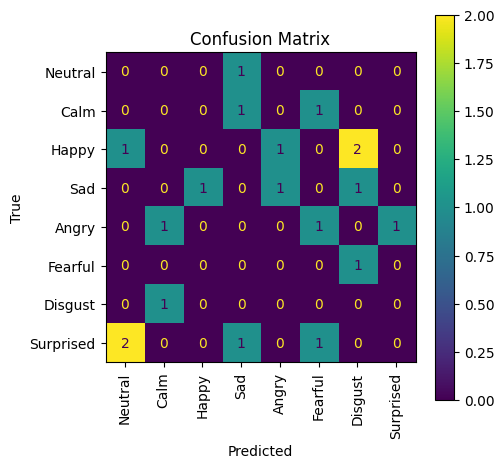

-> Iteração 8



,Metrics
Recall,0.052632
Precision,0.184211
F1-score,0.081871


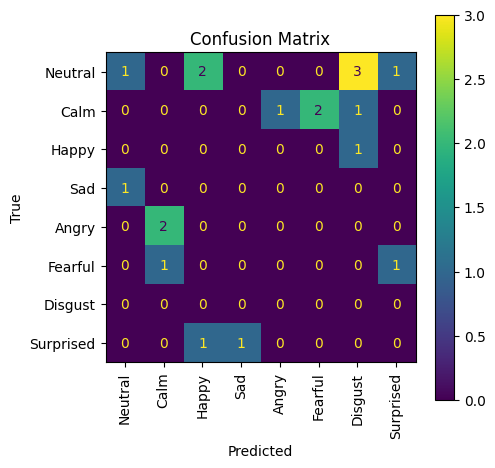

-> Iteração 9



,Metrics
Recall,0.157895
Precision,0.342105
F1-score,0.213534


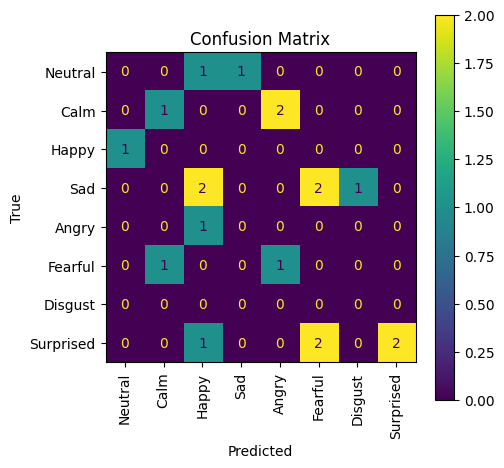

In [281]:
print("------------------ Cross-Validation ------------------")
cv_2_1_1(expressions_data, expressions_target, 10, expressions_labels, 1)

3.1.2. Train-only

------------------ Train-Only ------------------


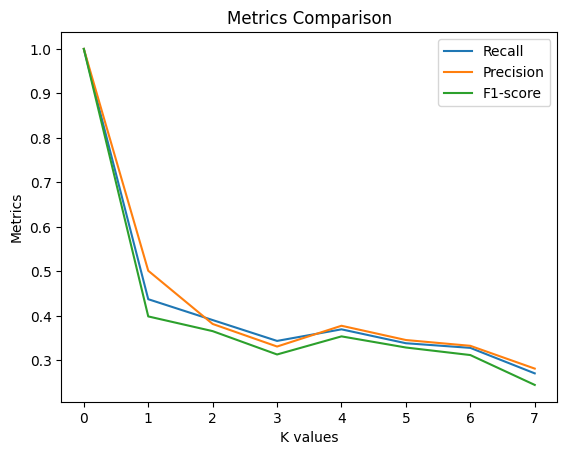

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


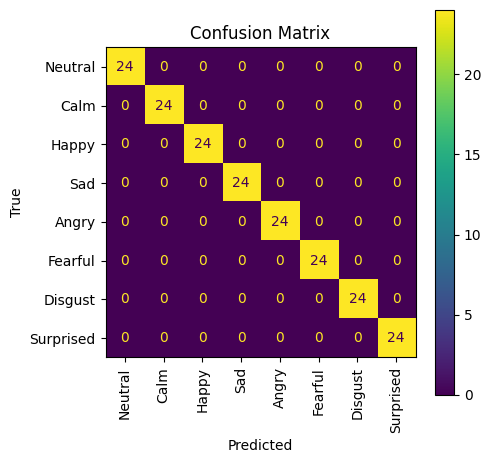

In [282]:
print("------------------ Train-Only ------------------")
to_2_1_2(expressions_data, expressions_target, expressions_labels, True)

3.1.2. TVT 40-30-30

------------------ Train-Validation-Test ------------------


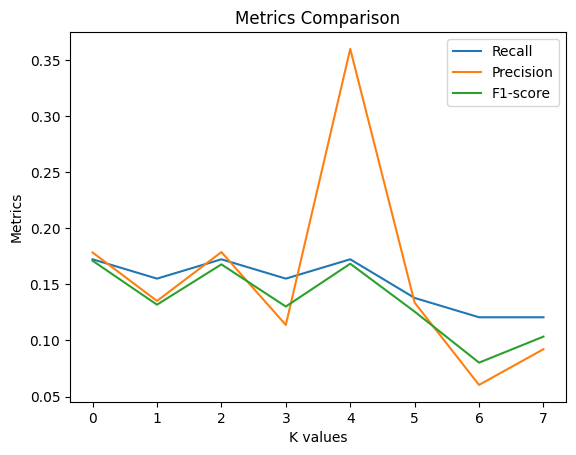

Best k: 1


,Metrics
Recall,0.137931
Precision,0.138259
F1-score,0.129967


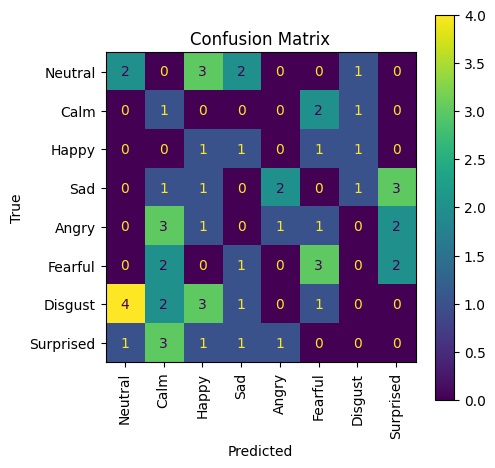

In [283]:
print("------------------ Train-Validation-Test ------------------")
tvt_2_1_2(expressions_data, expressions_target, expressions_labels, True)

3.1.2. 10x10-fold cross-validation (10CV)

------------------ Cross-Validation ------------------
-> Iteração 0



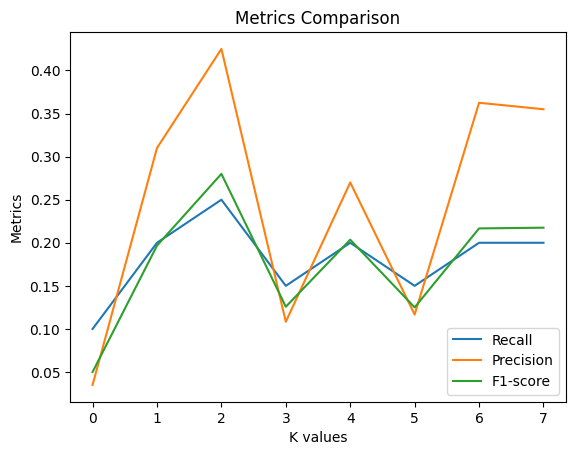

Best k: 5


,Metrics
Recall,0.250
Precision,0.425
F1-score,0.280


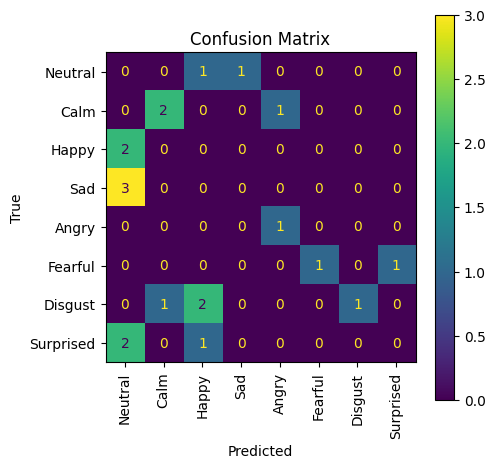

-> Iteração 1



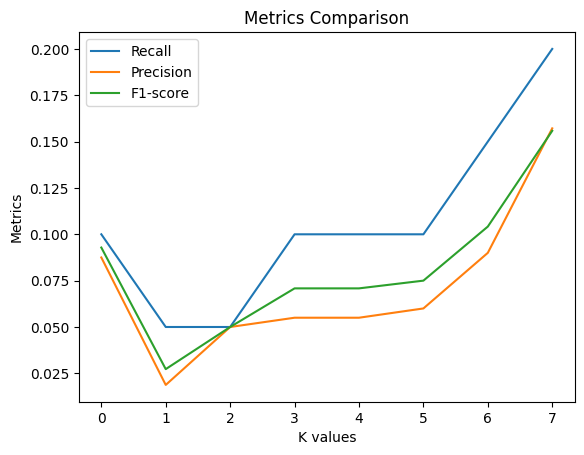

Best k: 15


,Metrics
Recall,0.200000
Precision,0.157143
F1-score,0.155833


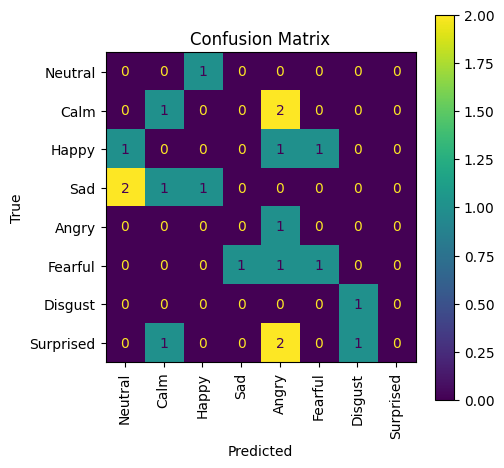

-> Iteração 2



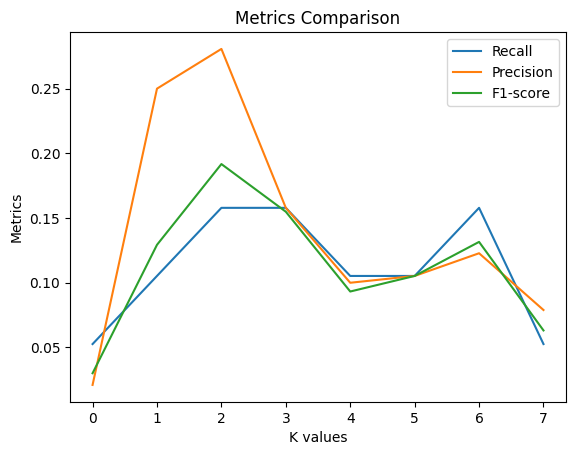

Best k: 5


,Metrics
Recall,0.157895
Precision,0.280702
F1-score,0.191729


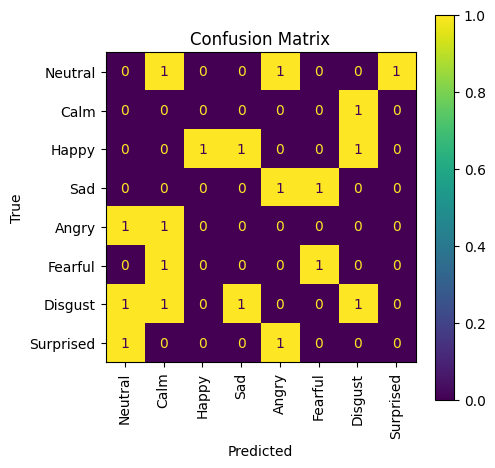

-> Iteração 3



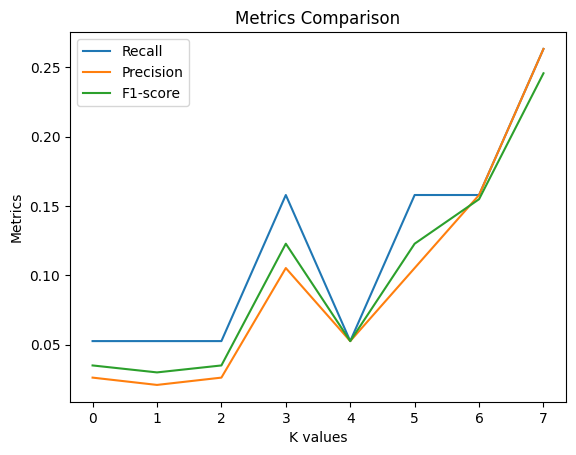

Best k: 15


,Metrics
Recall,0.263158
Precision,0.263158
F1-score,0.245614


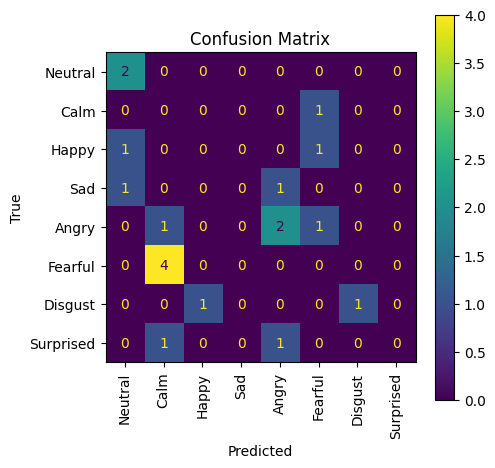

-> Iteração 4



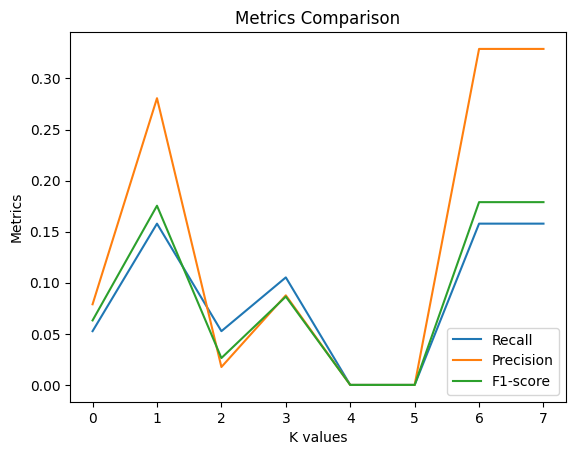

Best k: 13


,Metrics
Recall,0.157895
Precision,0.328947
F1-score,0.178947


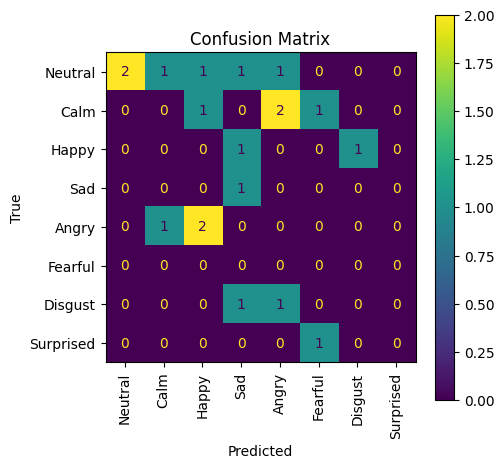

-> Iteração 5



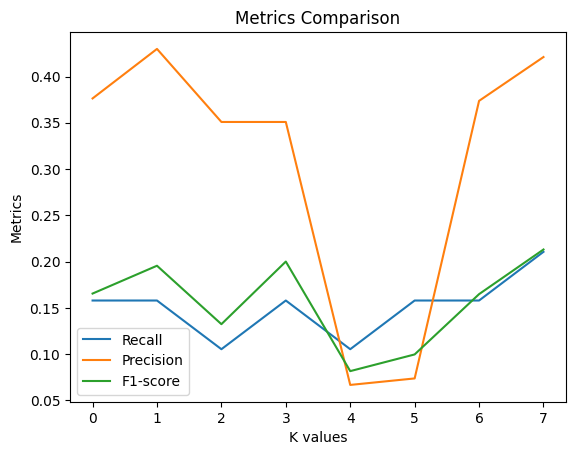

Best k: 15


,Metrics
Recall,0.210526
Precision,0.421053
F1-score,0.213033


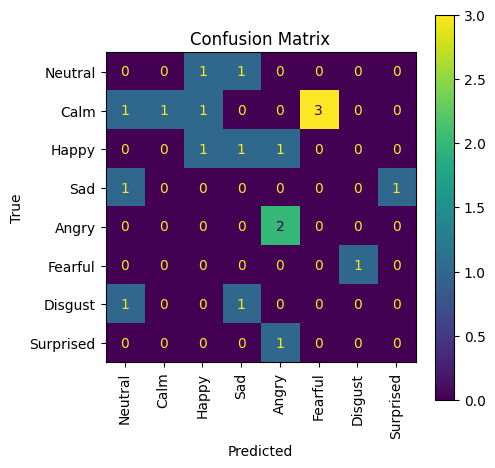

-> Iteração 6



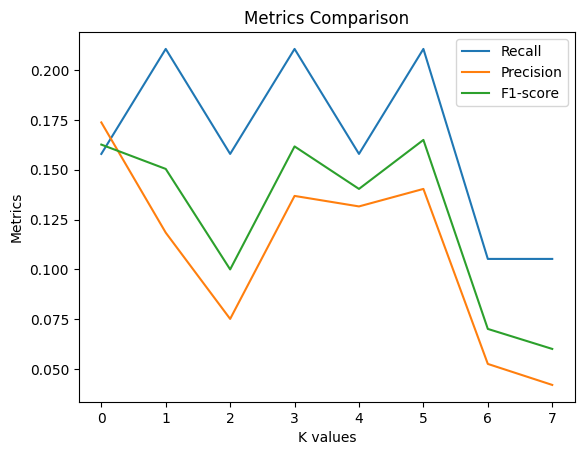

Best k: 11


,Metrics
Recall,0.210526
Precision,0.140351
F1-score,0.164912


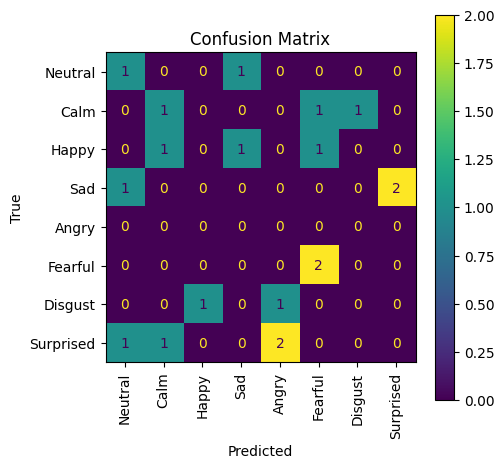

-> Iteração 7



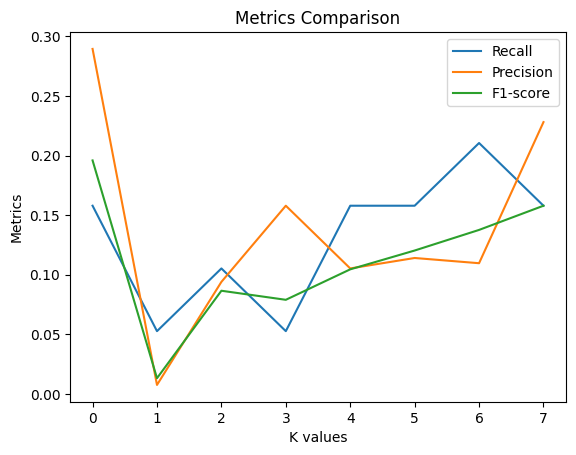

Best k: 1


,Metrics
Recall,0.157895
Precision,0.289474
F1-score,0.195906


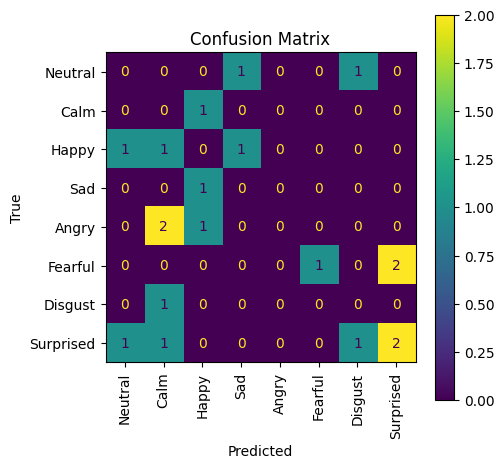

-> Iteração 8



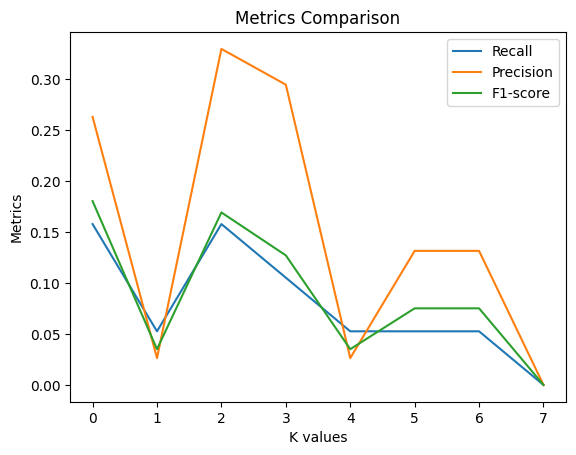

Best k: 1


,Metrics
Recall,0.157895
Precision,0.263158
F1-score,0.180451


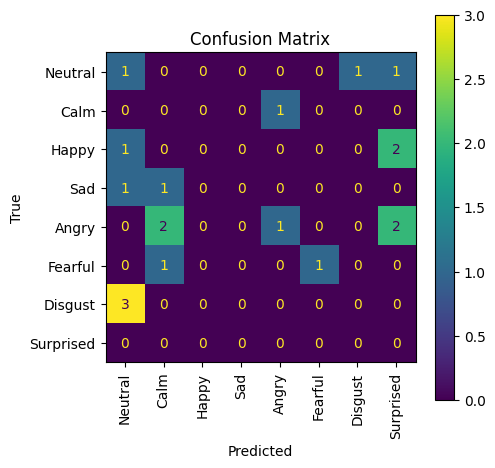

-> Iteração 9



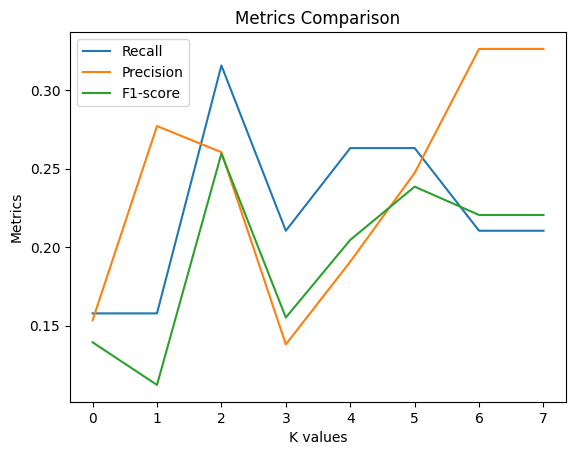

Best k: 5


,Metrics
Recall,0.315789
Precision,0.260526
F1-score,0.259649


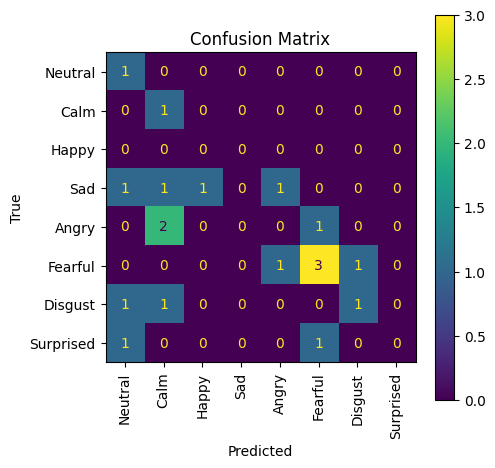

In [284]:
print("------------------ Cross-Validation ------------------")
cv_2_1_2(expressions_data, expressions_target, expressions_labels, True)

##### 3.2. ReliefF

------------------ Features Ranking ------------------


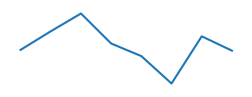

Number of Features: 1
Best k: 5
F1-score: 0.1272506229402781


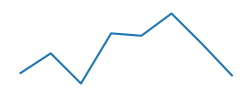

Number of Features: 2
Best k: 11
F1-score: 0.134320584638189


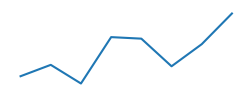

Number of Features: 3
Best k: 15
F1-score: 0.1046455938697318


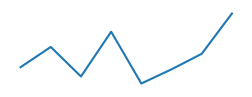

Number of Features: 4
Best k: 15
F1-score: 0.1341582498224572


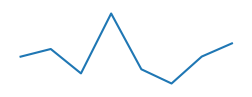

Number of Features: 5
Best k: 7
F1-score: 0.18387023593466423


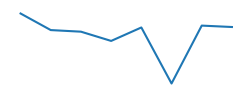

Number of Features: 6
Best k: 1
F1-score: 0.07148281063088364


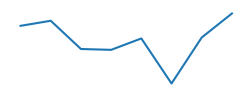

Number of Features: 7
Best k: 15
F1-score: 0.07281947261663287


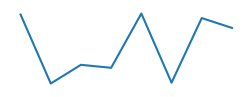

Number of Features: 8
Best k: 9
F1-score: 0.06369416024588438


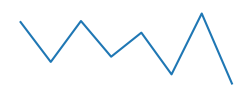

Number of Features: 9
Best k: 13
F1-score: 0.10935708616280093


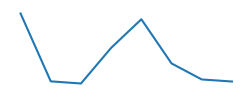

Number of Features: 10
Best k: 1
F1-score: 0.1165893015030946


In [285]:
print("------------------ Features Ranking ------------------")
feat = reliefF(expressions_data, expressions_target)
number_repetitions = 10
f1_score_elbow, f1_score_3, str_print = ranking_features(expressions_data, expressions_target, feat, number_repetitions, True)

3.2.2 Elbow Graph

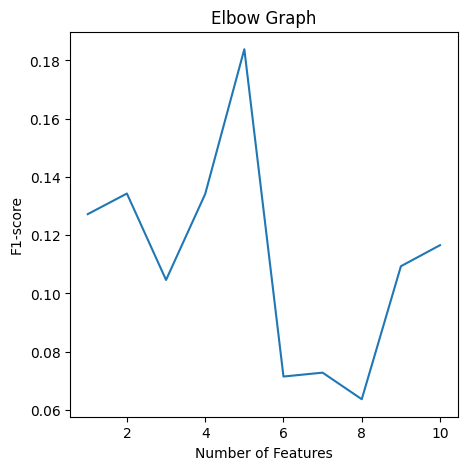

In [286]:
plot_elbow(f1_score_elbow)

3.2.3 Validação dos Resultados

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.115326,0.152517,0.188194,0.128042,0.102805,0.047918,0.142479,0.113727
Nº of features: 2,0.100663,0.132588,0.083695,0.165006,0.161064,0.197165,0.148421,0.096789
Nº of features: 3,0.086673,0.097225,0.079918,0.122946,0.121528,0.095896,0.116402,0.144863
Nº of features: 4,0.104173,0.131359,0.091655,0.151816,0.082249,0.101297,0.122187,0.176306
Nº of features: 5,0.101814,0.114683,0.073713,0.174303,0.080651,0.056753,0.101975,0.124138
Nº of features: 6,0.133354,0.120730,0.119513,0.112475,0.122712,0.080060,0.124138,0.123066
Nº of features: 7,0.127591,0.133025,0.102704,0.101798,0.114040,0.065667,0.115076,0.140827
Nº of features: 8,0.149711,0.090612,0.106620,0.104056,0.150603,0.091296,0.146689,0.138258
Nº of features: 9,0.149097,0.106082,0.150259,0.111726,0.137677,0.092646,0.158366,0.082789
Nº of features: 10,0.152893,0.087656,0.085591,0.119870,0.147345,0.104889,0.089478,0.087500


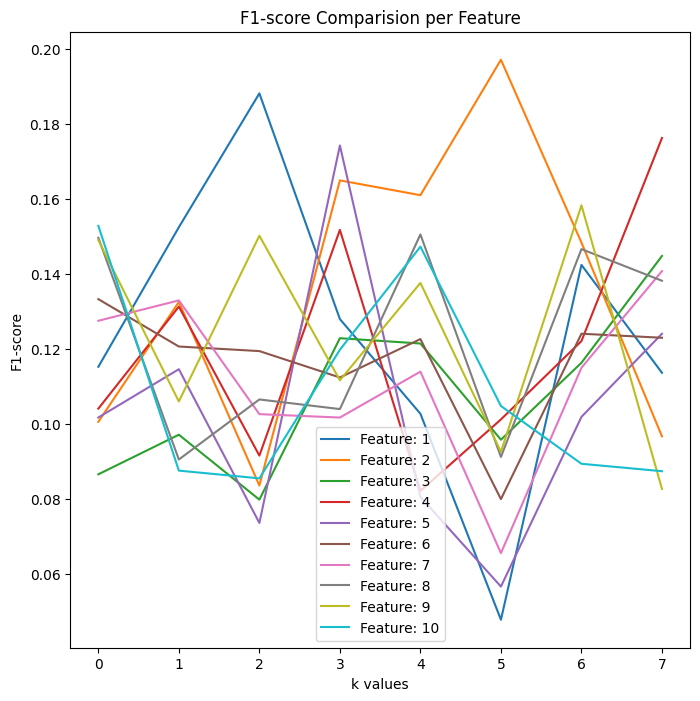

In [287]:
results(f1_score_3, feat)

3.2.4 Resultados dos Testes

In [288]:
ideal_model(str_print, number_repetitions)

Number of Features: 1
Best k: 5
F1-score: 0.1272506229402781
------------------------------
Number of Features: 2
Best k: 11
F1-score: 0.134320584638189
------------------------------
Number of Features: 3
Best k: 15
F1-score: 0.1046455938697318
------------------------------
Number of Features: 4
Best k: 15
F1-score: 0.1341582498224572
------------------------------
Number of Features: 5
Best k: 7
F1-score: 0.18387023593466423
------------------------------
Number of Features: 6
Best k: 1
F1-score: 0.07148281063088364
------------------------------
Number of Features: 7
Best k: 15
F1-score: 0.07281947261663287
------------------------------
Number of Features: 8
Best k: 9
F1-score: 0.06369416024588438
------------------------------
Number of Features: 9
Best k: 13
F1-score: 0.10935708616280093
------------------------------
Number of Features: 10
Best k: 1
F1-score: 0.1165893015030946
------------------------------


#### 4. Rede Neuronal Feedforward

In [289]:
def best_neuron(array_f1, array_neurons, labels, speed, tv):
    best_f1 = np.argmax(array_f1)
    best_neuron = array_neurons[best_f1]

    print("Best neuron: " + str(best_neuron))

    if speed == "fixed":
        clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=best_neuron, max_iter=2000)
    elif speed == 'variable':
        clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=best_neuron, max_iter=2000)
    else:
        clf = MLPClassifier(activation='logistic', hidden_layer_sizes=best_neuron, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)
    
    x = np.concatenate((tv["TRAIN"][0], tv["VALIDATION"][0]))
    y = np.concatenate((tv["TRAIN"][1], tv["VALIDATION"][1]))

    clf.fit(x, y)
    
    y_pred = clf.predict(tv["TEST"][0])
    y_true = tv['TEST'][1]

    metrics(y_true, y_pred, labels)

In [290]:
def multi_layer_percepton(data, target, labels, speed):
    tv = train_validation_test(data, target, 0.4, 0.3)
    
    array_neurons = np.arange(5, 500, 5)

    neural_networks = []

    array_f1 = []

    for i in array_neurons:
        if speed == "fixed":
            clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        elif speed == 'variable':
            clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        else:
            clf = MLPClassifier(activation='logistic', hidden_layer_sizes=i, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)

        neural_networks.append(clf.fit(tv["TRAIN"][0], tv["TRAIN"][1]))

        y_pred = clf.predict(tv["VALIDATION"][0])

        y_true = tv["VALIDATION"][1]

        cm, r, ps, fs = metrics(y_true, y_pred, None)

        array_f1.append(fs)

    best_neuron(array_f1, array_neurons, labels, speed, tv)


------------------ Fixed learning speed------------------


Best neuron: 255


,Metrics
Recall,0.086207
Precision,0.007432
F1-score,0.013684


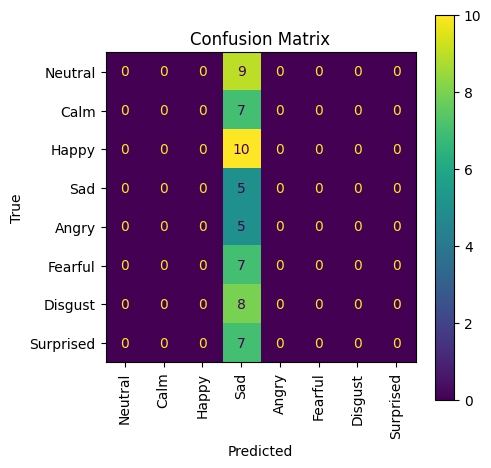

In [291]:
print("------------------ Fixed learning speed------------------")
multi_layer_percepton(expressions_data, expressions_target, expressions_labels, "fixed")

------------------ Variable learning speed------------------
Best neuron: 475


,Metrics
Recall,0.120690
Precision,0.014566
F1-score,0.025995


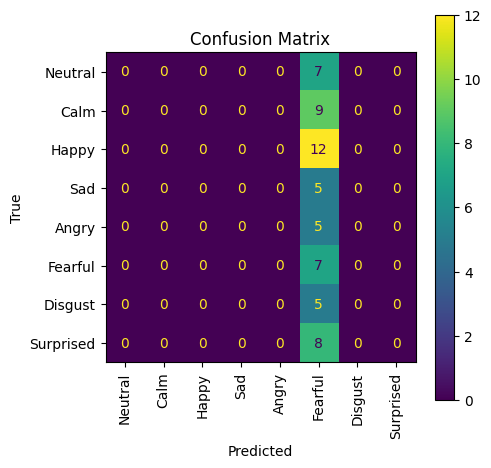

In [292]:
print("------------------ Variable learning speed------------------")
multi_layer_percepton(expressions_data, expressions_target, expressions_labels, "variable")

------------------ Momentum coeficient------------------
Best neuron: 315


,Metrics
Recall,0.120690
Precision,0.014566
F1-score,0.025995


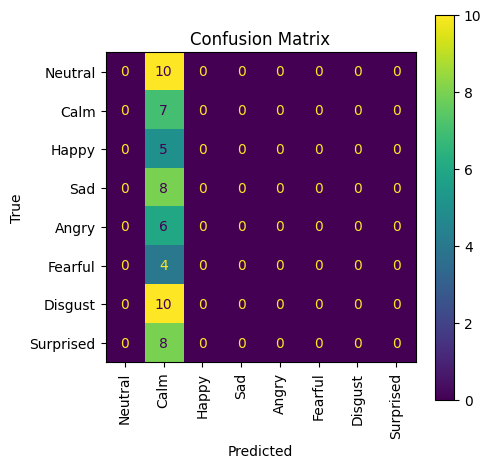

In [293]:
print("------------------ Momentum coeficient------------------")
multi_layer_percepton(expressions_data, expressions_target, expressions_labels, "momentum")